# Gaussian Mixtures for generating new faces and for Anomaly Detection

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Clustering-and-Classifying-Olivetti-Faces"):
    raise ValueError("Please change working directory to 'path/Clustering-and-Classifying-Olivetti-Faces' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Clustering-and-Classifying-Olivetti-Faces


In [3]:
!pip install -r requirements.txt

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Olivetti Faces Dataset

In [5]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
list(olivetti)

['data', 'images', 'target', 'DESCR']

In [6]:
X_olivetti = olivetti.data
y_olivetti = olivetti.target
face_width = int(np.sqrt(X_olivetti.shape[1]))

## Split data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_olivetti, y_olivetti, test_size=0.3, stratify=y_olivetti, random_state=42)

In [8]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=1/3, stratify=y_valid_test)

## Training a Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(0.99)
gm = GaussianMixture(n_components=40, random_state=42)

X_train_reduced = pca.fit_transform(X_train)
gm.fit(X_train_reduced)

GaussianMixture(n_components=40, random_state=42)

In [10]:
gm.weights_

array([0.01071429, 0.05      , 0.05714286, 0.03214286, 0.03214286,
       0.02142857, 0.02142857, 0.02857143, 0.01071429, 0.025     ,
       0.05714286, 0.025     , 0.02142857, 0.02857143, 0.025     ,
       0.03571429, 0.025     , 0.025     , 0.04285714, 0.025     ,
       0.07857143, 0.00714286, 0.03214286, 0.025     , 0.03214286,
       0.01428571, 0.01428571, 0.00714286, 0.02142857, 0.025     ,
       0.01428571, 0.01428571, 0.00714286, 0.025     , 0.01785714,
       0.01428571, 0.01428571, 0.01071429, 0.01071429, 0.01428571])

In [12]:
gm.means_

array([[ 1.79326842e+00,  3.98064617e+00, -1.94424446e+00, ...,
        -4.94545312e-02,  5.01797029e-02, -2.28830787e-02],
       [-1.24551976e+00,  1.47396938e+00, -2.29184743e+00, ...,
         3.52594157e-02, -1.09286818e-02, -1.06626747e-02],
       [-2.43362658e+00,  9.97285359e-02, -2.22233206e-01, ...,
         2.97705689e-02, -4.15919707e-02,  3.36845103e-03],
       ...,
       [-3.76039100e+00, -3.07225013e+00, -6.14368248e+00, ...,
         3.63555656e-02,  1.00835515e-02, -1.04628770e-02],
       [-7.20964640e-01,  2.37940351e+00, -1.05283870e+00, ...,
        -1.63272787e-02, -2.31629014e-02, -2.84108686e-02],
       [-3.85365647e+00,  1.46440244e+00,  4.81036353e+00, ...,
        -8.84176232e-04,  2.38155974e-02,  3.88480001e-03]])

In [13]:
gm.covariances_

array([[[ 3.70660114e-01, -8.49280007e-01,  5.74620752e-01, ...,
         -2.14731971e-02,  1.29388431e-02,  6.06224490e-04],
        [-8.49280007e-01,  3.78288801e+00,  2.59537022e+00, ...,
          3.35089768e-02,  3.86812439e-02, -1.10195246e-01],
        [ 5.74620752e-01,  2.59537022e+00,  9.22176550e+00, ...,
         -6.67066617e-02,  1.65569055e-01, -2.30773731e-01],
        ...,
        [-2.14731971e-02,  3.35089768e-02, -6.67066617e-02, ...,
          1.37904088e-03, -1.33325671e-03,  8.94339350e-04],
        [ 1.29388431e-02,  3.86812439e-02,  1.65569055e-01, ...,
         -1.33325671e-03,  2.99418480e-03, -4.02600352e-03],
        [ 6.06224490e-04, -1.10195246e-01, -2.30773731e-01, ...,
          8.94339350e-04, -4.02600352e-03,  6.44677555e-03]],

       [[ 2.82640448e+00, -1.30737422e+00,  3.32945003e-01, ...,
          3.10613400e-03,  2.54462602e-02,  7.49558289e-02],
        [-1.30737422e+00,  3.10651779e+00,  7.02261287e-01, ...,
          7.58806719e-02,  2.87466963e

In [14]:
gm.converged_

True

In [15]:
gm.n_iter_

2

In [11]:
y_pred = gm.predict(X_train_reduced)
y_pred

array([20, 10, 34, 15, 14,  3, 16, 19,  2, 20, 34, 12, 28, 11, 13, 12,  7,
       20, 24, 20,  7, 14, 34,  2, 38, 20, 34, 33, 16, 20, 34, 16, 15, 20,
       39,  1, 11, 14,  7, 20, 22, 21,  7,  4,  1, 10,  2, 35, 26, 35, 18,
       20, 18, 24, 14, 19, 15,  7, 22,  2, 22, 22, 35, 31, 22, 18, 24, 19,
       37, 33, 20, 30,  0, 36, 20, 17, 14, 29, 10, 20, 10,  8,  2, 15, 21,
       27, 12, 25, 15, 33,  1, 17,  2,  1, 36, 39,  4,  9, 16, 24, 31, 20,
        2, 24,  0, 35, 33, 39, 20,  1,  4,  6,  5,  2, 24,  4, 18,  6, 22,
       11,  9, 17, 16,  9,  3, 22, 13,  5,  3, 10, 17, 23, 38,  1, 11,  3,
       18, 27, 29, 10, 30,  1,  5, 15, 20, 28, 36,  4, 29,  7, 20,  4, 24,
       13,  2, 17,  6, 10, 23, 32, 22, 18, 39, 20, 11,  4,  2, 11,  2,  0,
       15,  6,  9,  1, 13, 24, 13,  9, 28, 29, 20, 24,  7, 10, 15, 20,  9,
       30,  8, 10, 18, 25, 20, 31, 18, 33, 23,  2, 18, 25,  5,  4, 38,  4,
       14,  9, 15,  6, 33,  6, 31, 29, 29, 22, 32,  2, 11,  2, 16, 30, 19,
        3, 12,  1, 10,  1

Component 1


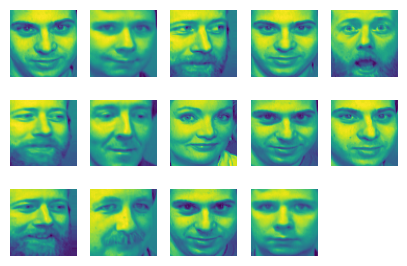

Component 2


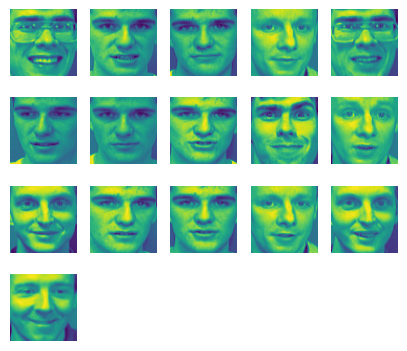

Component 3


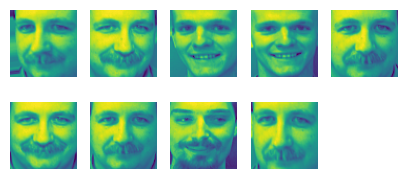

Component 4


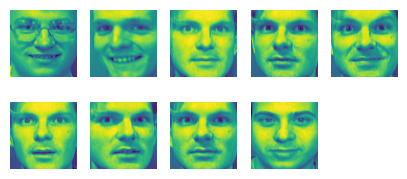

Component 5


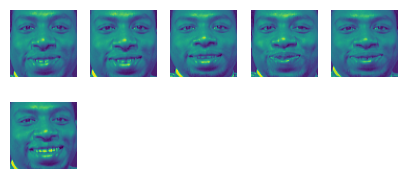

Component 6


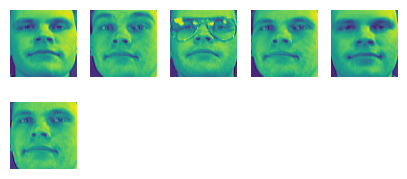

Component 7


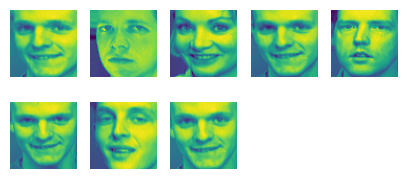

In [ ]:
for component_id in range(1,8):
    faces = X_train[y_pred==component_id]
    n_rows = (len(faces) - 1) // 5 + 1
    print(f"Component {component_id}")
    plt.figure(figsize=(5, n_rows * 1.1))
    for i, face in enumerate(faces):
        plt.subplot(n_rows, 5, i + 1)
        plt.imshow(face.reshape(64, 64))
        plt.axis("off")
    plt.show()